# TME 1 - Arbres de décision, sélection de modèles

In [1]:
import numpy as np
import collections as cl
import pickle
from sklearn . tree import export_graphviz
from sklearn . tree import DecisionTreeClassifier as DTree
import pydotplus
from IPython.display import IFrame
import matplotlib.pyplot as plt

## L'essentiel sur les arbres de décision
### Exercice 1 - Entropie
Le but de cet exercice est d’implémenter les fonctions utiles au calcul du partitionnement optimal, i.e.
les fonctions de calcul d’entropie. Ne passer pas trop de temps sur cette partie ! Passer si vous n’y
arrivez pas. Il n’est pas nécessaire de coder ces fonctions pour la suite du TME.

#### 1.1  Soit un objet itérable vect (une liste ou un vecteur numpy par exemple) qui contient une liste de label. Coder une fonction entropie(vect) qui calcule l’entropie de ce vecteur.

In [2]:
def entropie(vect):
    entrop = 0
    hist = cl.Counter(vect)
    n = len(vect)
    for label in hist:
        py = hist[label]/n
        entrop += py*np.log(py)
    
    return -entrop

#### 1.2  Coder la fonction entropie_cond(list_vect) qui à partir d’une liste de listes de labels (la partition des labels), calcule l’entropie conditionnelle de la partition.

In [3]:
def entropie_cond(list_vect):
    n = 0
    entrop = 0
    for vect in list_vect:
        pPi = len(vect)
        entrop += pPi * entropie(vect)
        n += len(vect)
    return entrop/n

#### 1.3  Calculer pour chaque attribut binaire l’entropie et l’entropie conditionnelle du vote selon la partition induite par l’attribut (les exemples dont la valeur de l’attribut est 1 vs les autres). Calculer également la différence entre l’entropie et l’entropie conditionnelle pour chaque attribut.

In [4]:
# data : tableau ( films , features ) , id2titles : dictionnaire id -> titre ,
# fields : id feature -> nom
[ data , id2titles , fields ]= pickle.load(open("imdb_extrait.pkl","rb"))
# la derniere colonne est le vote
datax = data [: ,:32]
datay = np.array ([1 if x[33]>6.5 else -1 for x in data ])

In [5]:
print(data.shape)
print(datax.shape)
print(datay.shape)

(4587, 34)
(4587, 32)
(4587,)


In [6]:
ent = np.zeros(28)
ent_cond = np.zeros(28)
diff_ent = np.zeros(28)
for i in range(28):
    vecti = datax[:,i]  #i-ème feature

    #calculs
    ent[i] = entropie(vecti)
    list_vecti = [datay[(vecti==1)],datay[vecti!=1]]
    ent_cond[i] = entropie_cond(list_vecti)
    diff_ent[i] = np.abs(ent[i] - ent_cond[i])
    
    #affichage
    print("----------------------")
    print(fields[i])
    print("entropie :", ent[i])
    print("entropie conditionnelle :",ent_cond[i])
    print("différence :",diff_ent[i])


----------------------
Sci-Fi
entropie : 0.39161210183852996
entropie conditionnelle : 0.6799402806092876
différence : 0.2883281787707576
----------------------
Crime
entropie : 0.5029905774584
entropie conditionnelle : 0.6836092907830238
différence : 0.18061871332462376
----------------------
Romance
entropie : 0.5226986043605234
entropie conditionnelle : 0.6840711988780971
différence : 0.1613725945175737
----------------------
Animation
entropie : 0.18257760424522337
entropie conditionnelle : 0.6825230243876741
différence : 0.4999454201424507
----------------------
Music
entropie : 0.13351996077339376
entropie conditionnelle : 0.6840615675797059
différence : 0.5505416068063121
----------------------
Comedy
entropie : 0.6576445592687681
entropie conditionnelle : 0.6729819945731972
différence : 0.015337435304429103
----------------------
War
entropie : 0.1839105713426079
entropie conditionnelle : 0.6777655712037746
différence : 0.49385499986116665
----------------------
Horror
entropie

##### A quoi correspond une valeur de 0 ? une valeur de 1 ?

##### Quel est le meilleur attribut pour la première partition ?

In [7]:
print(fields[np.argmax(ent)])
print(fields[np.argmin(ent_cond)])

Drama
Drama


## Quelques expériences préliminaires

In [26]:
print('tree'+str(53)+'.pdf')

tree53.pdf


#### 1.4  Sur la base de données imdb, apprendre quelques arbres de profondeurs différentes. Visualiser-les.

In [38]:
for taille_max in range(3,16, 2):
    print('Profondeur maximum = ',taille_max,':')
    id2genre = [ x[1] for x in sorted (fields.items())[:-2]]
    dt = DTree ()
    dt.max_depth = 3 # on fixe la taille max de l ’ arbre a 5
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    dt.fit(datax, datay)
    dt.predict(datax[:5 ,:])
    print('   Score = ',dt.score(datax, datay), '\n')
    tdot = export_graphviz ( dt , feature_names = id2genre )
    pydotplus.graph_from_dot_data(tdot).write_pdf('tree'+str(taille_max)+'.pdf')
    IFrame("./tree"+str(taille_max)+".pdf", width=600, height=300)

Profondeur maximum =  3 :
   Score =  0.7183344233703945 

Profondeur maximum =  5 :
   Score =  0.7183344233703945 

Profondeur maximum =  7 :
   Score =  0.7183344233703945 

Profondeur maximum =  9 :
   Score =  0.7183344233703945 

Profondeur maximum =  11 :
   Score =  0.7183344233703945 

Profondeur maximum =  13 :
   Score =  0.7183344233703945 

Profondeur maximum =  15 :
   Score =  0.7183344233703945 



In [35]:
IFrame("./tree3.pdf", width=600, height=300)

##### - Taille max = 5

In [10]:
id2genre = [ x[1] for x in sorted (fields.items())[:-2]]
dt = DTree ()
dt.max_depth = 5 # on fixe la taille max de l ’ arbre a 5
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax, datay))
tdot = export_graphviz ( dt , feature_names = id2genre )
pydotplus.graph_from_dot_data(tdot).write_pdf('tree5.pdf')

0.736647045999564


True

In [11]:
IFrame("./tree5.pdf", width=600, height=300)

##### Taille max = 7

In [12]:
id2genre = [ x[1] for x in sorted (fields.items())[:-2]]
dt = DTree ()
dt.max_depth = 7 # on fixe la taille max de l ’ arbre a 5
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax, datay))
tdot = export_graphviz ( dt , feature_names = id2genre )
pydotplus.graph_from_dot_data(tdot).write_pdf('tree7.pdf')

0.775888380204927


True

In [37]:
IPython.display(IFrame("./tree7.pdf", width=600, height=300))

NameError: name 'IPython' is not defined

##### Taille max = 10

In [14]:
id2genre = [ x[1] for x in sorted (fields.items())[:-2]]
dt = DTree ()
dt.max_depth = 10 # on fixe la taille max de l ’ arbre a 5
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax, datay))
tdot = export_graphviz ( dt , feature_names = id2genre )
pydotplus.graph_from_dot_data(tdot).write_pdf('tree10.pdf')

0.8495748855461086


True

In [15]:
IFrame("./tree10.pdf", width=600, height=300)

##### Taille max = 20

In [16]:
id2genre = [ x[1] for x in sorted (fields.items())[:-2]]
dt = DTree ()
dt.max_depth = 10 # on fixe la taille max de l ’ arbre a 5
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax, datay))
tdot = export_graphviz ( dt , feature_names = id2genre )
pydotplus.graph_from_dot_data(tdot).write_pdf('tree20.pdf')

0.8491388707216045


True

In [17]:
IFrame("./tree20.pdf", width=600, height=300)

##### Que remarquez-vous quant au nombre d’exemples séparés à chaque niveau en fonction de la profondeur ?

On remarque que plus on est en profondeur dans l'arbre, moins d'exemples sont separés. C'est tout à fait logique!

##### 1.5 - Calculer les scores de bonne classification. Comment ils évoluent en fonction de la profondeur ? Est-ce normal ?
Les scores s'améliorent avec la profondeur. C'est logique car il y a plus de séparations de cas. Il faudra néanmoins faire attention au sur apprentissage.

##### 1.6 - Ces scores sont-ils un indicateur fiable du comportement de l’algorithme ? Comment obtenir un indicateur plus fiable ?

## Sur et sous-apprentissage

##### 1.7 - Pour différents partitionnement, par exemple des partages en (0.2, 0.8), (0.5, 0.5), (0.8, 0.2)), tracer les courbes de l’erreur en apprentissage et de l’erreur en test en fonction de la profondeur du modèle.

#### Partage en (0.2, 0.8) : 

In [18]:
datax_app = datax[:int(4587*0.2)]
datax_test = datax[int(4587*0.2):]
datay_app = datay[:int(4587*0.2)]
datay_test = datay[int(4587*0.2):]

In [19]:
print(datax_app.shape)
print(datax_test.shape)
print(datay_app.shape)
print(datay_test.shape)

(917, 32)
(3670, 32)
(917,)
(3670,)


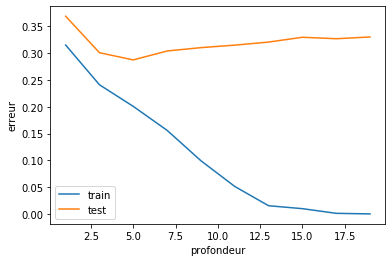

In [20]:
depths = np.arange(1, 21, 2)
scores_app = [] 
scores_test = [] 
for max_depth in depths :
    id2genre = [ x[1] for x in sorted (fields.items())[:-2]]
    dt = DTree ()
    dt.max_depth = max_depth # on fixe la taille max de l ’ arbre
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    dt.fit(datax_app, datay_app)
    scores_app.append(1 - dt.score(datax_app, datay_app))
    scores_test.append(1 - dt.score(datax_test, datay_test))
    #tdot = export_graphviz ( dt , feature_names = id2genre )
    #pydotplus.graph_from_dot_data(tdot).write_pdf('tree_test1.pdf')
plt.figure()
plt.plot(depths, scores_app,label="train")
plt.plot(depths, scores_test,label="test")
plt.xlabel("profondeur")
plt.ylabel("erreur")
plt.legend()

  
plt.show()


#### Partage en (0.5, 0.5) : 

In [21]:
datax_app = datax[:int(4587*0.5)]
datax_test = datax[int(4587*0.5):]
datay_app = datay[:int(4587*0.5)]
datay_test = datay[int(4587*0.5):]

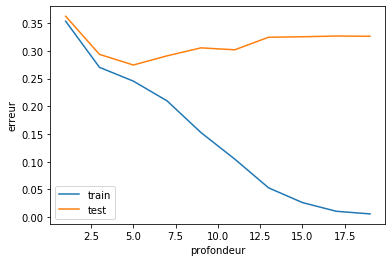

In [22]:
scores_app = [] 
scores_test = [] 
for max_depth in depths :
    id2genre = [ x[1] for x in sorted (fields.items())[:-2]]
    dt = DTree ()
    dt.max_depth = max_depth # on fixe la taille max de l ’ arbre
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    dt.fit(datax_app, datay_app)
    scores_app.append(1 - dt.score(datax_app, datay_app))
    scores_test.append(1 - dt.score(datax_test, datay_test))
    #tdot = export_graphviz ( dt , feature_names = id2genre )
    #pydotplus.graph_from_dot_data(tdot).write_pdf('tree_test1.pdf')
plt.figure()
plt.plot(depths, scores_app,label="train")
plt.plot(depths, scores_test,label="test")
plt.xlabel("profondeur")
plt.ylabel("erreur")
plt.legend()

  
plt.show()


#### Partage en (0.8, 0.2) : 

In [23]:
datax_app = datax[:int(4587*0.8)]
datax_test = datax[int(4587*0.8):]
datay_app = datay[:int(4587*0.8)]
datay_test = datay[int(4587*0.8):]

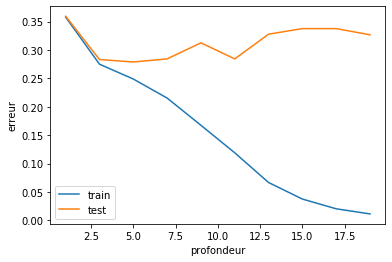

In [24]:
scores_app = [] 
scores_test = [] 
for max_depth in depths :
    id2genre = [ x[1] for x in sorted (fields.items())[:-2]]
    dt = DTree ()
    dt.max_depth = max_depth # on fixe la taille max de l ’ arbre
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    dt.fit(datax_app, datay_app)
    scores_app.append(1 - dt.score(datax_app, datay_app))
    scores_test.append(1 - dt.score(datax_test, datay_test))
    #tdot = export_graphviz ( dt , feature_names = id2genre )
    #pydotplus.graph_from_dot_data(tdot).write_pdf('tree_test1.pdf')
plt.figure()
plt.plot(depths, scores_app,label="train")
plt.plot(depths, scores_test,label="test")
plt.xlabel("profondeur")
plt.ylabel("erreur")
plt.legend()

  
plt.show()


## Validation croisée : sélection de modèle